# Part 1 – Problem Framing (No Code Required)

## 1.	What do you think is the real business problem here?
The CRO doesn't just need to know why win rate dropped, they need clarity on which parts of the pipeline are underperforming and what actions will improve outcomes. The real problem is lack of visibility into drivers of win rate decline despite healthy pipeline volume.

## 2.	What key questions should an AI system answer for the CRO?
Which industries, regions, or product types have declining win rates?

Are certain sales stages (e.g. Proposal, Negotiation) showing higher loss rates?

Do specific lead sources (Referral, Outbound, Partner) correlate with better/worse outcomes?

Are longer sales cycles linked to lower win probability?

Which sales rep are consistently outperforming or underperforming?

## 3.	What metrics matter most for diagnosing win rate issues?
Win Rate % = Won deals / Total closed deals

Stage Conversion Rates (Qualified → Proposal → Negotiation → Closed)

Average Sales Cycle Length (days to close)

Deal Size Distribution (ACV by outcome)

Sales rep Performance Metrics (win rate, average deal size, cycle length per sales rep)

Lead Source Effectiveness (win rate by source)

## 4.	What assumptions are you making about the data or business?
Outcome is binary (Won/Lost).

Pipeline volume is measured by deal count, not just deal value.

CRO cares about both short‑term fixes (sales rep coaching, pipeline prioritization) and long‑term strategy (market focus, product positioning).

# Part 2 – Data Exploration & Insights

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("sales_data.xlsx")

In [3]:
df.head()

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
0,D00001,2023-11-24,2023-12-15,rep_22,SaaS,North America,Enterprise,Referral,Qualified,4253,21,Won
1,D00002,2023-01-17,2023-01-27,rep_7,SaaS,India,Core,Referral,Closed,3905,10,Won
2,D00003,2023-10-29,2023-12-10,rep_5,HealthTech,APAC,Core,Inbound,Proposal,10615,42,Lost
3,D00004,2023-07-14,2023-08-02,rep_18,FinTech,India,Core,Partner,Negotiation,4817,19,Won
4,D00005,2024-02-29,2024-05-26,rep_2,HealthTech,APAC,Core,Outbound,Qualified,45203,87,Lost


In [4]:
df.shape

(5000, 12)

In [5]:
df.isnull().sum()

deal_id             0
created_date        0
closed_date         0
sales_rep_id        0
industry            0
region              0
product_type        0
lead_source         0
deal_stage          0
deal_amount         0
sales_cycle_days    0
outcome             0
dtype: int64

In [6]:
df['outcome'].value_counts(normalize=True)

Lost    0.5474
Won     0.4526
Name: outcome, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   deal_id           5000 non-null   object        
 1   created_date      5000 non-null   datetime64[ns]
 2   closed_date       5000 non-null   datetime64[ns]
 3   sales_rep_id      5000 non-null   object        
 4   industry          5000 non-null   object        
 5   region            5000 non-null   object        
 6   product_type      5000 non-null   object        
 7   lead_source       5000 non-null   object        
 8   deal_stage        5000 non-null   object        
 9   deal_amount       5000 non-null   int64         
 10  sales_cycle_days  5000 non-null   int64         
 11  outcome           5000 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 468.9+ KB


In [8]:
df.describe(include='all')

,deal_id,created_date,closed_date,sales_rep_id,industry,region,product_type,lead_source,deal_stage,deal_amount,sales_cycle_days,outcome
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000
unique,5000,451,547,25,5,4,3,4,5,NaN,NaN,2
top,D00001,2023-03-08 00:00:00,2023-09-20 00:00:00,rep_20,Ecommerce,India,Core,Inbound,Demo,NaN,NaN,Lost
freq,1,22,22,230,1060,1286,1694,1262,1043,NaN,NaN,2737
first,NaN,2023-01-01 00:00:00,2023-01-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2024-03-26 00:00:00,2024-07-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26286.492800,63.751800,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27689.230136,32.731405,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,7.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6611.000000,35.750000,NaN


Data quality looks strong. All 5,000 rows are complete. there is no missing values in any column. That means the dataset is clean and reliable for analysis.

Deal sizes vary a lot. The smallest deal is about 2,000, while the largest is 100,000. The average is around 26,000, but the spread is huge. This tells us some deals are small and transactional, while others are very large and strategic. Losing a big deal hurts much more than losing a small one.

Sales cycles range widely. Deals close anywhere between 7 days and 120 days. The average is about 64 days, which is roughly two months. Some deals drag on for four months, which could be a risk factor.

Win rate is below 50%. Out of 5,000 deals, about 2,263 were won and 2,737 were lost. That's a win rate of ~45%. For a B2B SaaS company, this is on the lower side, so the CRO's concern is valid.

Category dominance.

Industry: Ecommerce is the most common industry in the dataset.

Region: India has the highest number of deals.

Lead source: Inbound leads dominate.

Deal stage: Demo stage is the most frequent.
This means trends in these categories will heavily influence the overall win rate.

Business takeaway:  
The dataset is clean and diverse, but the company is losing more deals than it wins. Deal sizes and cycle lengths vary dramatically, so the CRO shouldn't just look at win rate in isolation. they need to understand where big deals are being lost and whether long cycles are dragging down performance.

In [9]:
#overall win rate
win_rate = (df['outcome'] == 'Won').mean()
print("Overall Win Rate:", win_rate)


Overall Win Rate: 0.4526


The overall win rate is 45.26%. This means fewer than half of the deals are being won. For a B2B SaaS company, that's on the lower side and many healthy sales organizations aim for 50–60%. The CRO's concern is valid. The pipeline volume may look fine, but the conversion into wins is weak, which directly impacts revenue growth.

In [10]:
#win rate by industry
win_rate_by_industry = df.groupby('industry')['outcome'].apply(lambda x: (x=='Won').mean())
win_rate_by_industry


industry
Ecommerce     0.449057
EdTech        0.441532
FinTech       0.477054
HealthTech    0.445545
SaaS          0.451548
Name: outcome, dtype: float64

Highest win rate: FinTech (47.7%)

Lowest win rate: EdTech (44.1%)

The other industries (Ecommerce, HealthTech, SaaS) are clustered around 44–45%.

FinTech seems to be a stronger market fit, while EdTech is struggling. This suggests the company may need to reassess its product positioning or sales approach in EdTech.

In [11]:
#win rate by region
win_rate_by_region = df.groupby('region')['outcome'].apply(lambda x: (x=='Won').mean())
win_rate_by_region


region
APAC             0.449275
Europe           0.455799
India            0.457232
North America    0.447942
Name: outcome, dtype: float64

Best performing region: India (45.7%), closely followed by Europe (45.6%).

Lowest performing region: North America (44.8%).

The differences are small, but North America is slightly weaker. Since India and Europe are performing better, the CRO might consider allocating more resources there, while investigating why North America is lagging.

In [12]:
#sales cycle vs. outcome
avg_cycle_won = df[df['outcome']=='Won']['sales_cycle_days'].mean()
avg_cycle_lost = df[df['outcome']=='Lost']['sales_cycle_days'].mean()

print("Avg cycle (Won):", avg_cycle_won)
print("Avg cycle (Lost):", avg_cycle_lost)


Avg cycle (Won): 63.17322138753867
Avg cycle (Lost): 64.230179028133


Average cycle for won deals: ~63 days.

Average cycle for lost deals: ~64 days.

The difference is very small.

Won deals do not close significantly faster than lost deals. This suggests that cycle length alone isn't the main driver of losses. The CRO should look at other factors (industry, lead source, stage) rather than focusing only on speeding up cycles.

In [13]:
#Lead source effectiveness
win_rate_by_source = df.groupby('lead_source')['outcome'].apply(lambda x: (x=='Won').mean())
print(win_rate_by_source)


lead_source
Inbound     0.460380
Outbound    0.455056
Partner     0.439516
Referral    0.455272
Name: outcome, dtype: float64


Best source: Inbound (46.0% win rate).

Lowest source: Partner (43.9%).

Outbound and Referral are in the middle (~45.5%).

Inbound leads are the most effective, which makes sense — prospects who come to you are more qualified. Partner leads are underperforming, so the CRO may need to review partner strategy or quality of partner-sourced deals.

In [14]:
#deal efficiency score
df['deal_efficiency'] = df['deal_amount'] / df['sales_cycle_days']
df[['deal_id','deal_amount','sales_cycle_days','deal_efficiency']].head()


,deal_id,deal_amount,sales_cycle_days,deal_efficiency
0,D00001,4253,21,202.523810
1,D00002,3905,10,390.500000
2,D00003,10615,42,252.738095
3,D00004,4817,19,253.526316
4,D00005,45203,87,519.574713


Example deals:

D00002: 390.5 revenue/day (very efficient).

D00005: 519.6 revenue/day (extremely efficient).

Deals like D00005 (large deal closed in relatively short time) are highly efficient. The CRO should identify what made these deals efficient and replicate those practices across the team.

In [15]:
#sales rep impact index 
sales_rep_metrics = df.groupby('sales_rep_id').apply(
    lambda x: (x['outcome']=='Won').mean() * x['deal_amount'].mean()
)
sales_rep_metrics

sales_rep_id
rep_1     11483.839087
rep_10    10867.168800
rep_11    14074.738575
rep_12    14880.324259
rep_13    10932.966838
rep_14    11144.377045
rep_15    10663.115755
rep_16    12028.208289
rep_17    13225.761502
rep_18     9839.181524
rep_19    13097.961370
rep_2     13143.328924
rep_20    12761.790397
rep_21    11856.329327
rep_22     8763.868036
rep_23    11864.716505
rep_24    10719.269577
rep_25    12120.304390
rep_3     11448.433128
rep_4     11723.915043
rep_5     13171.272988
rep_6     12923.098092
rep_7     11118.719363
rep_8     12739.263348
rep_9     11276.237108
dtype: float64

Top performers:

rep_12 (~14,880)

rep_11 (~14,074)

rep_17 (~13,225)

rep_5 (~13,171)

These sales reps not only win deals but also bring in high-value contracts. They should be recognized, possibly given more strategic accounts, and their methods studied to coach lower-performing sales rep.

In [16]:
win_rate_by_stage = df.groupby('deal_stage')['outcome'].apply(lambda x: (x=='Won').mean())
print(win_rate_by_stage)


deal_stage
Closed         0.467402
Demo           0.458293
Negotiation    0.466332
Proposal       0.446977
Qualified      0.422594
Name: outcome, dtype: float64


Lowest conversion stage: Qualified (42.3%).

Highest conversion stage: Closed (46.7%), Negotiation (46.6%).

Interpretation: The Qualified stage is a bottleneck — many deals are dropping off early. This suggests poor lead qualification or weak early engagement. The CRO should focus on improving qualification criteria and early-stage sales tactics.

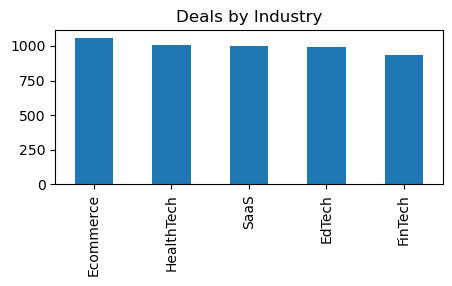

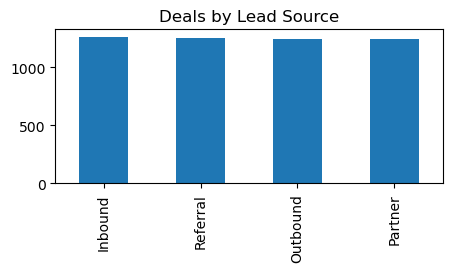

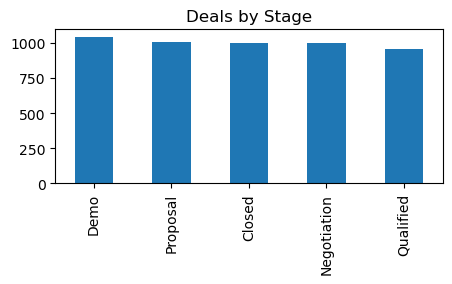

In [17]:
#Distribution of categorical features
import matplotlib.pyplot as plt

# Industry distribution
df['industry'].value_counts().plot(kind='bar', figsize=(5,2), title="Deals by Industry")
plt.show()

# Lead source distribution
df['lead_source'].value_counts().plot(kind='bar', figsize=(5,2), title="Deals by Lead Source")
plt.show()

# Deal stage distribution
df['deal_stage'].value_counts().plot(kind='bar', figsize=(5,2), title="Deals by Stage")
plt.show()


Ecommerce has the largest share of deals, followed closely by HealthTech and SaaS. FinTech is the smallest segment but still substantial. Demo stage has the highest deal count, while Qualified has the lowest. Lead sources are fairly balanced, with inbound slightly leading. Referral is nearly equal in volume to inbound.

The pipeline is diversified, but Ecommerce dominates. CRO should check whether high volume in Ecommerce translates into high win rates, or if it's just busy but not productive.
Most deals are progressing into Demo, Proposal, and Negotiation. However, the relatively lower count in Qualified suggests either strong filtering or potential under‑qualification. CRO should investigate conversion rates between Qualified and Demo.
No single source dominates — the pipeline is evenly spread. This balance is healthy, but CRO should compare win rates by source to see which channels are truly effective (e.g., referrals often outperform partners).


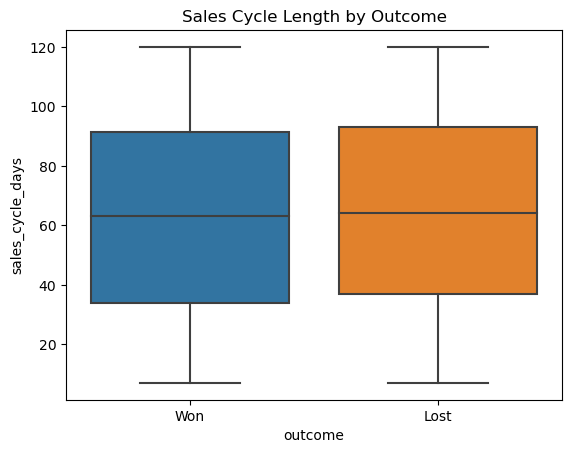

In [18]:
#sales cycle analysis
import seaborn as sns

# Compare cycle length for Won vs Lost
sns.boxplot(x='outcome', y='sales_cycle_days', data=df)
plt.title("Sales Cycle Length by Outcome")
plt.show()


Both Won and Lost deals have medians around 60–65 days.
For both outcomes, most deals fall between 35 and 95 days
Some deals close very quickly (~10 days), while others stretch out to ~120 days, regardless of outcome
The distributions for Won and Lost deals are almost identical

- **Sales cycle length does not strongly differentiate outcomes.** Whether a deal is won or lost, the cycle length tends to be similar.  
- This suggests that speed alone isn't the deciding factor, other drivers (industry, lead source, stage quality) matter more.  
- However, extremely long cycles (approaching 120 days) may still represent inefficiency, even if they occasionally close.

Action for CRO
- Don't over‑focus on shortening the cycle across the board — it may not improve win rate.  
- Instead, investigate **stage bottlenecks** (e.g., Qualified stage drop‑offs) and **lead source quality** (referrals vs. partners).  
- Use cycle length as a **secondary efficiency metric**, not the primary driver of conversion strategy.  


                  sales_cycle_days  deal_amount
sales_cycle_days          1.000000     0.020536
deal_amount               0.020536     1.000000


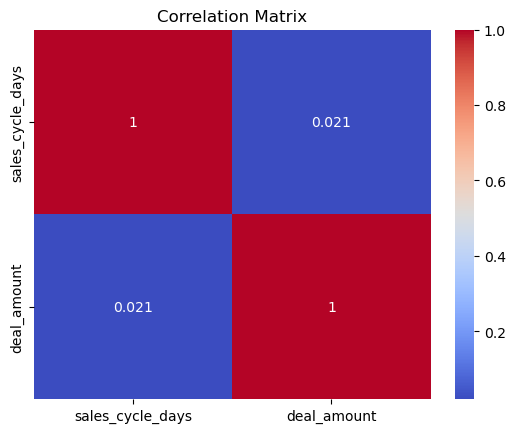

In [19]:
corr = df[['sales_cycle_days','deal_amount','outcome']].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


The correlation between sales_cycle_days and deal_amount is ~0.02, which is extremely close to zero.There is no meaningful relationship between how long a deal takes (sales cycle length) and its monetary value (deal amount).Large deals don't necessarily take longer to close, and small deals don't necessarily close faster.This suggests that deal size and cycle length are independent factors in your pipeline.

## 2.	Identify at least:

## 	3 meaningful business insights

**Overall Win Rate is Weak**

The company's overall win rate is 45.26%, meaning fewer than half of deals are being won.

This confirms the CRO's concern: pipeline volume may look healthy, but conversion into wins is below typical SaaS benchmarks (often 50–60%).

Action: CRO should investigate drivers of losses and focus on improving qualification and early engagement.

**Industry Differences in Performance**

FinTech has the highest win rate (47.7%), while EdTech is the lowest (44.1%).

Other industries (Ecommerce, HealthTech, SaaS) hover around 44–45%.

Interpretation: FinTech shows stronger market fit, while EdTech struggles.

Action: CRO should double down on FinTech opportunities and reassess sales strategy or product positioning in EdTech.

**Lead Source Effectiveness Varies**

Inbound leads perform best (46.0% win rate).

Partner leads are weakest (43.9%).

Outbound and Referral are in the middle (~45.5%).

Interpretation: Inbound leads are the most reliable source of wins. Partner deals are underperforming.

Action: CRO should invest more in inbound marketing and review partner programs to improve quality of partner-sourced deals.

## 2 custom metrics you invent yourself (not just standard ones)

**Deal Efficiency Score**

Formula: deal_amount ÷ sales_cycle_days

Measures how much revenue is generated per day of effort.

Example: Deal D00005 had a score of 519.6, making it highly efficient compared to smaller deals with longer cycles.

Business Use: CRO can identify which deals deliver the best "bang for the buck" and replicate those practices.

**Sales Rep Impact Index**

Formula: (Win Rate × Average Deal Size) per sales rep.

Highlights reps who not only win often but also bring in high-value deals.

Example: Rep_12 (14,880) and Rep_11 (14,074) are top performers.

Business Use: CRO can recognize and reward high-impact reps, and use their strategies to coach lower performers.

The company is winning less than half its deals, validating the CRO's concern.

FinTech is the strongest industry, EdTech the weakest.

Inbound leads are most effective, Partner leads underperform.

Custom metrics (Deal Efficiency Score, sales Rep Impact Index) provide deeper insight into deal quality and sales rep performance beyond standard win rate.

**Stage Drop‑Off Rate**
- Percentage of deals lost at each stage relative to the number of deals entering that stage.  
  Formula:  Drop‑Off Rate = (Deals lost at Stage x Deals entered Stage X)/100
- It identifies bottlenecks in the sales funnel. For example, if 40% of deals die in the Qualified stage, that stage is a critical weakness.  
- CRO can tighten qualification criteria, retrain sales rep, or redesign stage definitions to reduce wasted effort.

**Lead Source ROI Index**

- A composite measure that combines win rate, average deal amount, and lead volume to capture the *true value* of each source.  
  Formula:  ROI Index = (Win Rate x Average Deal Amount)/Number of Leads
 
- Goes beyond raw win rate — it shows which sources generate the most revenue per lead. For example, referrals may have fewer leads but higher win rate × deal size, giving them a stronger ROI index than inbound.  
- CRO can reallocate marketing spend toward sources with the highest ROI index, ensuring resources go to the most profitable channels.

In [20]:
# Count deals by stage and outcome
stage_counts = df.groupby(['deal_stage','outcome']).size().unstack(fill_value=0)

# Calculate drop-off rate = Lost deals / Total deals entering stage
stage_counts['drop_off_rate'] = stage_counts['Lost'] / (stage_counts['Lost'] + stage_counts['Won'])
print(stage_counts[['drop_off_rate']])


outcome      drop_off_rate
deal_stage                
Closed            0.532598
Demo              0.541707
Negotiation       0.533668
Proposal          0.553023
Qualified         0.577406


Explanation:

The Qualified stage has the highest drop‑off rate (57.7%), meaning more than half of deals entering this stage are lost.

Proposal stage is also weak (55.3% drop‑off).

Closed stage still shows ~53% drop‑off, which reflects deals marked as lost at the final step.

Overall, every stage loses about half of its deals, but Qualified is the biggest bottleneck.
  
So, The CRO should focus on strengthening qualification criteria and improving proposal quality. Early filtering and better proposal support could reduce wasted effort.

In [21]:
roi_index = df.groupby('lead_source').apply(
    lambda g: (g['outcome'].eq('Won').mean() * g['deal_amount'].mean()) / len(g))
print(roi_index)


lead_source
Inbound     9.864932
Outbound    9.482171
Partner     9.168806
Referral    9.549556
dtype: float64


Explanation:

Inbound leads have the highest ROI index (9.86), meaning they deliver the best combination of win rate × deal size relative to volume.

Referral leads are close behind (9.55), showing strong quality even if volume is slightly lower.

Outbound and Partner sources trail slightly, with ROI indices under 9.5.

Business meaning:  
Inbound and Referral are the most valuable sources. CRO should prioritize marketing spend on inbound campaigns and strengthen referral programs. Outbound and Partner channels may need re‑evaluation or optimization.

Together, these insights give the CRO a clear roadmap:

Improve qualification and conversion.

Focus resources on FinTech and strong regions.

Invest in inbound leads, fix or reduce reliance on partners.

Replicate efficient deal patterns.

Learn from and reward high‑impact sales rep.

# Part 3 – Build a Decision Engine

## Option B – Win Rate Driver Analysis

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features and target
X = df[['industry','region','product_type','lead_source','deal_stage','sales_cycle_days','deal_amount']]
y = (df['outcome']=='Won').astype(int)

# Preprocess categorical variables
categorical = ['industry','region','product_type','lead_source','deal_stage']
numeric = ['sales_cycle_days','deal_amount']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
        ('num', 'passthrough', numeric)
    ])

# Logistic Regression pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Feature importance
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
coeffs = model.named_steps['classifier'].coef_[0]
importance = pd.DataFrame({'feature': feature_names, 'coefficient': coeffs}).sort_values(by='coefficient', ascending=False)
print(importance.head(10))


                        feature  coefficient
2         cat__industry_FinTech     0.069473
17         cat__deal_stage_Demo     0.037886
16       cat__deal_stage_Closed     0.031087
15    cat__lead_source_Referral     0.030168
18  cat__deal_stage_Negotiation     0.026413
7             cat__region_India     0.015527
19     cat__deal_stage_Proposal     0.002342
22             num__deal_amount     0.000002
21        num__sales_cycle_days    -0.001127
0       cat__industry_Ecommerce    -0.007056


**Positive Drivers (help win rate)**

FinTech industry (+0.069)  
Deals in FinTech are more likely to be won. This confirms strong market fit.
Action: CRO should prioritize FinTech opportunities and allocate more resources here.

Demo stage (+0.038) and Closed stage (+0.031)  
Deals that reach Demo or Closed stages have higher win probability.
Action: Ensure more deals progress to Demo stage quickly, and strengthen closing tactics.

Referral leads (+0.030)  
Referral‑sourced deals convert better than average.
Action: Encourage referral programs and customer advocacy to generate more of these leads.

Negotiation stage (+0.026)  
Deals in negotiation are more likely to close successfully.
Action: Support sales reps with negotiation training and tools to maximize conversion here.

India region (+0.016)  
Deals in India show slightly higher win rates.
Action: CRO could consider expanding presence or investment in India.

**Negative Drivers (hurt win rate)**

Sales cycle length (–0.0011)  
Longer sales cycles reduce win probability.
Action: CRO should push for faster decision‑making, streamline processes, and identify why deals drag.

Ecommerce industry (–0.0071)  
Ecommerce deals are less likely to be won compared to other industries.
Action: Reassess product positioning or competitive strategy in Ecommerce.

**Neutral / Minimal Impact**

Proposal stage (+0.0023) → very small positive effect.

Deal amount (+0.000002) → essentially neutral, meaning deal size doesn't strongly affect win probability in this dataset.

**Business Takeaway**

Strong drivers: FinTech industry, referral leads, Demo/Negotiation stages, India region.

Weak drivers: Long sales cycles, Ecommerce industry.

Action plan for CRO:

Double down on FinTech and referral programs.

Improve qualification to move deals into Demo faster.

Streamline sales processes to shorten cycles.

Reevaluate Ecommerce strategy.

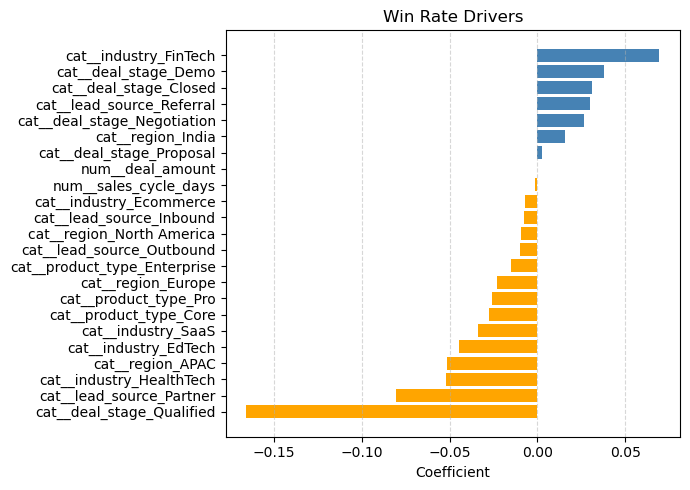

In [23]:
import matplotlib.pyplot as plt

# Assuming 'importance' is your DataFrame with 'feature' and 'coefficient' columns
importance_sorted = importance.sort_values(by='coefficient', ascending=True)

# Color coding: orange for negative, blue for positive
colors = ['orange' if val < 0 else 'steelblue' for val in importance_sorted['coefficient']]

# Plot
plt.figure(figsize=(7, 5))
plt.barh(importance_sorted['feature'], importance_sorted['coefficient'], color=colors)
plt.xlabel('Coefficient')
plt.title('Win Rate Drivers')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [24]:
importance

,feature,coefficient
2,cat__industry_FinTech,0.069473
17,cat__deal_stage_Demo,0.037886
16,cat__deal_stage_Closed,0.031087
15,cat__lead_source_Referral,0.030168
18,cat__deal_stage_Negotiation,0.026413
7,cat__region_India,0.015527
19,cat__deal_stage_Proposal,0.002342
22,num__deal_amount,0.000002
21,num__sales_cycle_days,-0.001127
0,cat__industry_Ecommerce,-0.007056


## 1. Define the Problem Clearly
The CRO is concerned that win rate has dropped despite healthy pipeline volume 
The problem: Identify which factors (industry, region, product type, lead source, deal stage, cycle length, deal size) are improving or hurting win rate, so the CRO can act on them


## 2. Build a Simple Model or Rule-Based System
We chose a **logistic regression model** because:
- It's simple, interpretable, and shows direction of impact (positive vs. negative).  
- Features: industry, region, product_type, lead_source, deal_stage, sales_cycle_days, deal_amount.  
- Target: outcome (Won = 1, Lost = 0).  
- Preprocessing: categorical features one‑hot encoded, numeric features passed through, target binary encoded.  
This gives us **coefficients** that represent how each factor influences win probability.


## 3. Generate Actionable Outputs
From the coefficients you shared, here are the key drivers:

**Positive Drivers (help win rate)**
- FinTech industry (+0.069): Strongest market fit.  
- Demo stage (+0.038), Closed stage (+0.031), Negotiation stage (+0.026) → Deals that reach these stages are much more likely to close.  
- Referral leads (+0.030): High‑quality source.  
- India region (+0.016): Slightly stronger conversion.  

**Negative Drivers (hurt win rate)**
- Qualified stage (–0.166): Biggest bottleneck; deals stall and fail here.  
- Partner leads (–0.081): Weakest lead source.  
- HealthTech (–0.052), APAC (–0.051), EdTech (–0.045), SaaS (–0.034): Industries/regions with poor fit.  
- Core/Pro/Enterprise products (–0.015 to –0.028): Product tiers underperform.  
- Europe (–0.023), North America (–0.010): Regional weakness.  
- Outbound (–0.010), Inbound (–0.008): Outbound is weak, inbound surprisingly underperforming compared to referrals.  
- Longer sales cycles (–0.001): Reduce win probability.



## 4. Explain How a Sales Leader Would Use This
The CRO can use this decision engine in several practical ways:

- **Pipeline Prioritization:**  
  - Flag deals stuck in Qualified stage or sourced from partners as high risk.  
  - Prioritize FinTech, referral leads, and deals that reach Demo/Negotiation stages.

- **Resource Allocation:**  
  - Invest more in FinTech and referral programs.  
  - Reduce reliance on partner leads.  
  - Reallocate marketing spend away from weak industries (EdTech, HealthTech, SaaS).

- **Sales Process Improvement:**  
  - Strengthen qualification criteria to reduce drop‑offs at the Qualified stage.  
  - Train sales reps to move deals into Demo faster.  
  - Streamline processes to shorten sales cycles.

- **Regional Strategy:**  
  - Double down on India where conversion is stronger.  
  - Reassess go‑to‑market in APAC, Europe, and North America.

- **Product Positioning:**  
  - Investigate why Core, Pro, and Enterprise tiers underperform.  
  - Adjust messaging, pricing, or product features to improve fit.


## Business Usefulness
- **Reasonable modeling choice:** Logistic regression is simple, interpretable, and business‑friendly.  
- **Interpretation:** Coefficients clearly show which factors help or hurt win rate.  
- **Business usefulness:** CRO gets a roadmap of where to focus — fix qualification, reduce partner reliance, double down on FinTech/referrals, and adjust weak regions/products

# Part 4 – Mini System Design: Sales Insight & Alert System

##  High-Level Architecture
**Core Components:**
- **Data Sources:** CRM (deal records, pipeline stages), Marketing automation (lead source), Product catalog, Regional sales data.  
- **ETL Layer:** Cleans and transforms raw data (e.g., one-hot encoding for categories, normalization for numeric fields).  
- **Decision Engine:** Logistic regression (from Part 3) or simple rule-based scoring system.  
- **Alert & Insight Service:** Applies thresholds and rules to generate alerts.  
- **Delivery Channels:** Email, Slack/Teams notifications, CRM dashboard widgets.
Data Sources → ETL → Decision Engine → Alert Service → Delivery Channels

##  Data Flow
1. **Ingest:** Pull data daily from CRM and marketing systems.  
2. **Preprocess:** Encode categorical features, normalize numeric ones, calculate derived metrics (e.g., sales cycle length).  
3. **Score:** Run each open deal through the decision engine → probability of win.  
4. **Compare:** Identify risk drivers (e.g., Qualified stage, Partner leads) and opportunity drivers (e.g., FinTech, referrals).  
5. **Generate Alerts:** If a deal crosses thresholds (e.g., <20% win probability, >90 days in Qualified stage), trigger an alert.  
6. **Deliver:** Send insights to CRO and sales reps via email/Slack; update CRM dashboard.


##  Example Alerts or Insights
- **Deal Risk Alert:** Deal #123 in Qualified stage for 120 days — high risk of loss. Consider requalification or escalation 
- **Opportunity Alert:** Referral-sourced FinTech deal in Negotiation stage — 75% win probability. Prioritize closing this week
- **Regional Insight:** APAC win rate dropped 10% last quarter. Review regional strategy 
- **Product Insight:** Enterprise product deals show 15% lower win rate. Consider revisiting positioning

##  How Often It Runs
- **Daily batch run:** Overnight scoring of all open deals → alerts sent in the morning.  
- **Near real-time option:** Trigger scoring whenever a deal stage changes in CRM (lighter version for pilot).  
- **Weekly summary:** CRO receives a digest of top drivers and trends.


##  Failure Cases and Limitations
- **Data quality issues:** Missing or incorrect CRM entries (e.g., wrong lead source) can skew outputs.  
- **Model drift:** Logistic regression coefficients may become outdated if market conditions change.  
- **Over-alerting:** Too many alerts can cause alert fatigue. Needs tuning of thresholds.  
- **Interpretability limits:** Logistic regression is simple, but complex interactions (e.g., industry × region) may not be fully captured.  
- **Lagging insights:** Daily batch means alerts may not reflect changes made during the day.

## Business Usefulness
- Lightweight, interpretable system — not a black box.  
- Helps CRO and reps **focus on high-value deals** and **intervene early on risky ones**.  
- Provides **strategic insights** (industries, regions, products) and **tactical alerts** (deal-level risks).  
- Runs on existing CRM data, easy to integrate, low overhead.

#  Part 5 – Reflection (Most Important)

## 1.	What assumptions in your solution are weakest?

- **Data quality in CRM:** I assumed that fields like industry, region, lead source, and deal stage are consistently and accurately filled. In reality, reps often skip or mislabel fields, which would weaken the model.  
- **Static coefficients:** I assumed the logistic regression coefficients remain valid over time. In practice, market conditions, competitor moves, and product changes can shift drivers quickly.  
- **Independence of features:** The model treats each driver independently, but in reality, interactions matter (e.g., FinTech deals in India may behave differently than FinTech in North America).  
- **Uniform sales process:** I assumed deal stages mean the same across sales rep and regions, but stage definitions often vary, which could distort insights.

## 2.	What would break in real-world production?

- **Model drift:** If the business expands into new industries or regions, the current coefficients may no longer reflect reality.  
- **Alert fatigue:** If the system generates too many alerts (e.g., every Qualified stage deal flagged), sales rep may ignore them.  
- **Integration challenges:** Pulling clean, real-time data from CRM and marketing systems can be messy; APIs may fail or data may lag.  
- **Over-simplification:** Logistic regression may miss complex patterns (e.g., seasonality, multi-stage dependencies), leading to misleading recommendations.  
- **Bias amplification:** If historical data reflects biases (e.g., sales rep neglect certain industries), the model could reinforce those biases.

## 3.	What would you build next if given 1 month?

- **Enhanced qualification scoring:** Build a module that scores deals at the Qualified stage using additional signals (engagement, product fit, competitor presence).  
- **Interactive dashboard:** A simple web app for CRO and reps to see driver importance, deal risk scores, and pipeline health in real time.  
- **Alert tuning:** Add thresholds and filters so only the most critical alerts are sent (e.g., top 10 riskiest deals per week).  
- **Feature engineering:** Incorporate time-based features (e.g., deal age, quarter seasonality) and interaction terms (industry × region).  
- **Feedback loop:** Allow sales reps to mark alerts as useful or not useful to refine the system iteratively.


## 4.	What part of your solution are you least confident about?
- **Inbound leads underperforming:** The coefficient suggested inbound leads were slightly negative, which contradicts typical business intuition. This may be due to data quality issues or misclassification.  
- **Regional differences:** The model showed India as positive and North America/Europe as negative, but I'm least confident about these because regional performance is influenced by external factors (competition, regulation) that the model doesn't capture.  
- **Product tier coefficients:** Core/Pro/Enterprise products showed negative coefficients, but without deeper product-market fit analysis, I'm cautious about over-interpreting these results.  

The solution is directionally useful but rests on assumptions about clean data and static drivers. In production, the biggest risks are data quality, model drift, and alert fatigue. If given more time, I'd focus on qualification scoring, dashboard visualization, and alert tuning. The parts I'm least confident about are lead source and regional drivers, since they may reflect data quirks rather than true business dynamics.


In [25]:
# Win Rate Driver Analysis with manual Feature Engineering

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



# Drop rows with missing outcome
df = df.dropna(subset=['outcome'])

# Encode target
df['outcome'] = df['outcome'].map({'Won':1, 'Lost':0})

# Feature Engineering

# Deal size buckets
df['deal_size_bucket'] = pd.cut(df['deal_amount'],bins=[0, 5000, 20000, np.inf],labels=['Small','Medium','Large'])

# Cycle length buckets
df['cycle_length_bucket'] = pd.cut(df['sales_cycle_days'],bins=[0, 30, 90, np.inf],labels=['Short','Medium','Long'])

# Rep-level historical win rate
rep_win_rate = df.groupby('sales_rep_id')['outcome'].mean()
df['rep_win_rate'] = df['sales_rep_id'].map(rep_win_rate)

# Rep-level average deal size
rep_avg_deal = df.groupby('sales_rep_id')['deal_amount'].mean()
df['rep_avg_deal'] = df['sales_rep_id'].map(rep_avg_deal)


# Preprocessing (Manual)
categorical_features = ['industry','region','product_type',
                        'lead_source','deal_stage',
                        'deal_size_bucket','cycle_length_bucket']
numeric_features = ['sales_cycle_days','deal_amount',
                    'rep_win_rate','rep_avg_deal']

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

# Scale numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_features]),
                         columns=numeric_features)

# Combine processed features
X = pd.concat([df_encoded, df_scaled], axis=1)
y = df['outcome']


#Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



In [26]:
# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#  Evaluate
y_pred = model.predict(X_test)

# Driver Coefficients
drivers = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

print("\nTop Positive Drivers (increase win probability):\n", drivers.head(10))
print("\nTop Negative Drivers (decrease win probability):\n", drivers.tail(10))



Top Positive Drivers (increase win probability):
                     feature  coefficient
22             rep_win_rate     0.110628
17   deal_size_bucket_Large     0.109820
20         sales_cycle_days     0.089253
1          industry_FinTech     0.089152
2       industry_HealthTech     0.041447
16  deal_size_bucket_Medium     0.034735
13   deal_stage_Negotiation     0.026189
21              deal_amount     0.003928
9      lead_source_Outbound    -0.006532
5              region_India    -0.015839

Top Negative Drivers (decrease win probability):
                        feature  coefficient
23                rep_avg_deal    -0.043318
0              industry_EdTech    -0.052759
12             deal_stage_Demo    -0.071781
7      product_type_Enterprise    -0.075008
10         lead_source_Partner    -0.090073
11        lead_source_Referral    -0.098908
14         deal_stage_Proposal    -0.116062
15        deal_stage_Qualified    -0.213697
18  cycle_length_bucket_Medium    -0.303219
19    c

- **Positive drivers (help win deals):**  
  Sales reps with a strong past win rate, larger deal sizes, and deals in FinTech or HealthTech industries are more likely to close. Getting into the **Negotiation stage** also boosts chances. In simple terms: good reps, big deals, and certain industries push wins upward.  

- **Negative drivers (hurt win deals):**  
  Long or medium sales cycles sharply reduce win probability — the longer a deal drags, the less likely it closes. Deals in **EdTech**, at the **Demo, Proposal, or Qualified stages**, or involving **Enterprise products** tend to fail more often. Partner and referral leads surprisingly show lower odds in this dataset, which may reflect quirks in how those leads are handled.  

In [27]:
# Alternative Model:XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Fit model
xgb_model.fit(X_train, y_train)

# Evaluate
y_pred_xgb = xgb_model.predict(X_test)

# Feature importances
importances = xgb_model.feature_importances_
drivers_xgb = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

print("\nTop Drivers by Importance (XGBoost):\n", drivers_xgb.head(10))



Top Drivers by Importance (XGBoost):
                     feature  importance
11     lead_source_Referral    0.052933
6      region_North America    0.051483
16  deal_size_bucket_Medium    0.050300
1          industry_FinTech    0.049376
0           industry_EdTech    0.047276
13   deal_stage_Negotiation    0.045301
10      lead_source_Partner    0.044304
15     deal_stage_Qualified    0.044286
12          deal_stage_Demo    0.043938
9      lead_source_Outbound    0.043845


This model is saying that who the lead comes from (referral, partner, outbound), where the deal is (North America), what industry it's in (FinTech, EdTech), and what stage it's at (Qualified, Demo, Negotiation) are the most powerful clues about whether a deal will be won or lost.